In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
TWEMOJI_DATASET = './datasets/samples/combined_csv.csv'

In [50]:
twemoji = pd.read_csv(TWEMOJI_DATASET)

In [51]:
twemoji = twemoji.reindex(np.random.permutation(twemoji.index))

# Cleaning and Preparing

In [52]:
# lets see how many columns 
# does the dataset have
twemoji.columns

Index(['id', 'annotations', 'id_text'], dtype='object')

In [53]:
# rename annotations to target
# rename id_text to tweet
twemoji = twemoji.rename(columns={"annotations":'target', "id_text":"tweet"})

In [54]:
twemoji.head() 

,id,target,tweet
1957397,742784115343253505,1420,NaN
2267674,745019823445291009_q,1056,NaN
3100596,742146485219950592,1138,NaN
3390431,742780093190295552,1420,NaN
2977902,743253126644383744,1114,NaN


In [55]:
# since the id column is no longer needed
# we can simply drop it
twemoji = twemoji.drop(columns=["id"])

In [56]:
twemoji.head()

,target,tweet
1957397,1420,NaN
2267674,1056,NaN
3100596,1138,NaN
3390431,1420,NaN
2977902,1114,NaN


In [57]:
# Lets check how many null values exist in 
# the dataset
twemoji['tweet'].isna().sum()

3878060

In [58]:
# We can't do much with null values
# So we drop them
twemoji = twemoji.dropna()

In [59]:
twemoji.head()

,target,tweet
1249679,1620,how am I frontin tho
1435821,1420,No deaths this season that made me feel sad af...
1743222,1381,"I kept saying ""do it do it do it"" can't wait f..."
1845637,1389,I did leave it but they found it thank God! Th...
1554685,1617,People gon switch wen ur ends do


In [60]:
# Lets check how big is the data set now
twemoji.shape

(88567, 2)

# Exploration

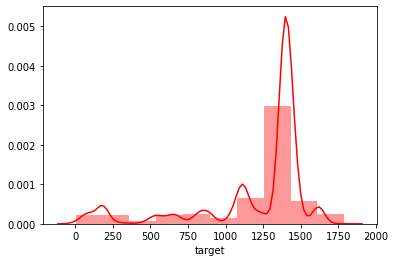

In [65]:
# lets see the distribution of our target values
sns.distplot(twemoji['target'], color='red', bins=10)

## Bag-Of-Words Model

`Bag of words` allows us to represent text as numberical feature vectors. 
This idea behind the bag of words model can be summarized as follows

1. Create a vocabulary of unique tokens, for example words, from the entire set of documents
2. Concstruct a feature vector from each document that contains the counts of how often wach word occurs
    in the particular document
    
Unique words in documents represent only a small subset of all words in the `bag of words` vocabulary, therfore the feature vectors will mostly consist of zeros, which is why we call them `sparse`
